# Endometrium analysis - clusters visualization

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures_primaryEpithelial/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.4 anndata==0.6.22rc1 umap==0.3.10 numpy==1.17.5 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


'/home/jovyan/my-conda-envs/myenvSC/bin/python'

## Load data

In [2]:
adata_original = sc.read('data/endometrium-N2-clean-manifold.h5ad')
adata_original.X.shape

(65191, 26245)

In [3]:
adata_original.obs.head()

batch   bh_pval  bonf_pval clinical day  \
index                                                                      
4861STDY7309368_AAACCTGAGATCCTGT     0  0.832772        1.0        U   U   
4861STDY7309368_AAACCTGCACCTCGGA     0  0.809091        1.0        U   U   
4861STDY7309368_AAACCTGTCAACACTG     0  0.809091        1.0        U   U   
4861STDY7309368_AAACCTGTCTAACGGT     0  0.809091        1.0        U   U   
4861STDY7309368_AAACGGGAGCTCCTTC     0  0.856750        1.0        U   U   

                                 individual  is_doublet  is_doublet_propagate  \
index                                                                           
4861STDY7309368_AAACCTGAGATCCTGT        A10       False                 False   
4861STDY7309368_AAACCTGCACCTCGGA        A10       False                 False   
4861STDY7309368_AAACCTGTCAACACTG        A10       False                 False   
4861STDY7309368_AAACCTGTCTAACGGT        A10       False                 False   
4861STDY7309368_AAACGGGAGCTCCTTC        A10       False                 False   

                                 leiden location  n_counts  n_genes  \
index                                                                 
4861STDY7309368_AAACCTGAGATCCTGT      4     ENMY   11092.0     3521   
4861STDY7309368_AAACCTGCACCTCGGA      2     ENMY    8831.0     2832   
4861STDY7309368_AAACCTGTCAACACTG      4     ENMY    4803.0     1834   
4861STDY7309368_AAACCTGTCTAACGGT      0     ENMY    7717.0     2611   
4861STDY7309368_AAACGGGAGCTCCTTC      6     ENMY    5644.0     2015   

                                  percent_mito phase           sample  \
index                                                                   
4861STDY7309368_AAACCTGAGATCCTGT      0.026776     S  4861STDY7309368   
4861STDY7309368_AAACCTGCACCTCGGA      0.030234     S  4861STDY7309368   
4861STDY7309368_AAACCTGTCAACACTG      0.013533     S  4861STDY7309368   
4861STDY7309368_AAACCTGTCTAACGGT      0.020345     S  4861STDY7309368   
4861STDY7309368_AAACGGGAGCTCCTTC      0.021616     S  4861STDY7309368   

                                  scrublet_cluster_score  scrublet_score  \
index                                                                      
4861STDY7309368_AAACCTGAGATCCTGT                0.035422        0.028668   
4861STDY7309368_AAACCTGCACCTCGGA                0.059091        0.063830   
4861STDY7309368_AAACCTGTCAACACTG                0.068966        0.059091   
4861STDY7309368_AAACCTGTCTAACGGT                0.059091        0.054705   
4861STDY7309368_AAACGGGAGCTCCTTC                0.022817        0.020690   

                                 treatment  type    zscore  
index                                                       
4861STDY7309368_AAACCTGAGATCCTGT         C  CBTM -0.546844  
4861STDY7309368_AAACCTGCACCTCGGA         C  CBTM  0.427611  
4861STDY7309368_AAACCTGTCAACACTG         C  CBTM  0.834157  
4861STDY7309368_AAACCTGTCTAACGGT         C  CBTM  0.427611  
4861STDY7309368_AAACGGGAGCTCCTTC         C  CBTM -1.065830

In [4]:
set(adata_original.obs.individual)

{'A10', 'A13', 'A16', 'A30', 'Endo8625698', 'Endo8712024', 'Endo8715415'}

In [5]:
adata_original.obs.at[ adata_original.obs[ 'individual'] == 'A10', 'phase']  = 'P'
adata_original.obs.at[ adata_original.obs[ 'individual'] == 'A16', 'phase']  = 'P'

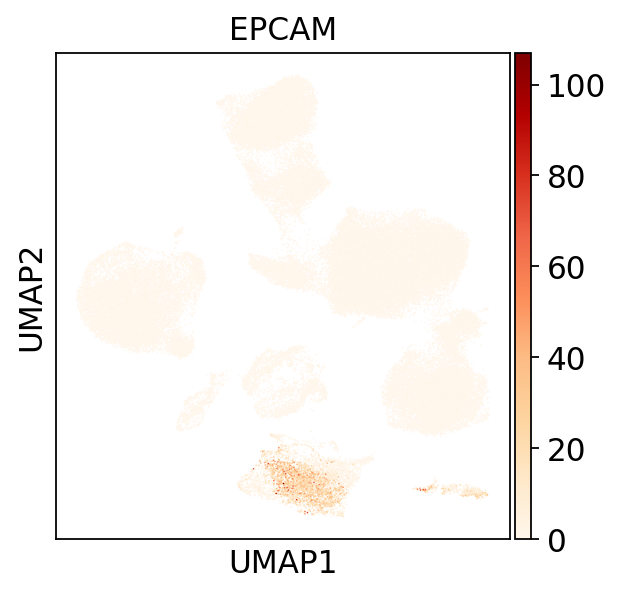

In [6]:
sc.pl.umap(adata_original, color=["EPCAM"], color_map='OrRd') 

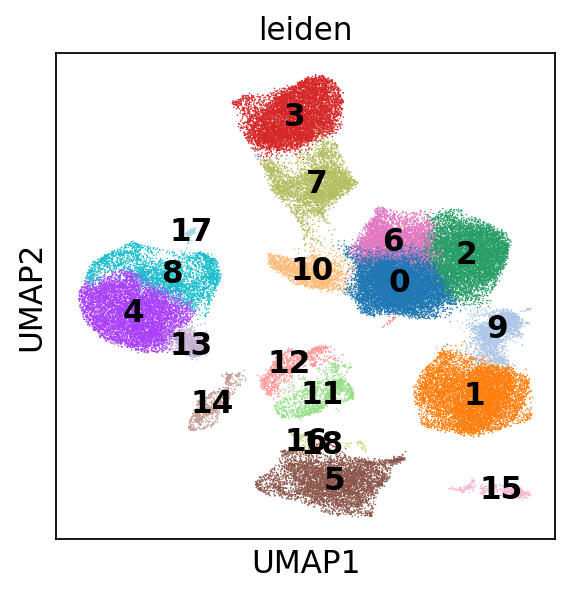

In [10]:
sc.pl.umap(adata_original, color=["leiden"], color_map='OrRd', legend_loc="on data") 

In [67]:
adata_original = adata_original[[i in ['5', '15', '16', '18'] for i in adata_original.obs['leiden'] ]]

## Reset object

In [68]:
adata_original.obs['leiden_K'] = adata_original.obs['leiden']
adata_original.obs['cycle_phase'] = adata_original.obs['phase']
adata = anndata.AnnData(X=adata_original.raw.X, var=adata_original.raw.var, obs=adata_original.obs, asview=False)

Trying to set attribute `.obs` of view, making a copy.


## Preprocess the data again

#### Filter non-expressed genes

In [69]:
sc.pp.filter_genes(adata, min_cells=5)

#### Normalize per cell

In [70]:
adata.raw = sc.pp.log1p(adata, copy=True)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

#### HVGs
These are going to be definetively different from the global annlysis. It is key to redefine these.

In [71]:
# Filter HVGs
sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, min_disp=0.5)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, min_disp=0.25)
# sc.pp.highly_variable_genes(adata, n_top_genes=2000)
highly_variable_genes = adata.var["highly_variable"]
adata = adata[:, highly_variable_genes]

In [72]:
adata.X.shape

(5777, 6040)

#### Scale and regress out cell cycle genes

In [73]:
# Scale
sc.pp.scale(adata, max_value=10)

/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:869: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [74]:
# Regress out cell cycle genes
cell_cycle_genes = [x.strip() for x in open(file='/home/jovyan/farm/gsea/raw/seurat_cellcycle/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
s_genes = [x for x in s_genes if x in adata.var_names]
g2m_genes = [x for x in g2m_genes if x in adata.var_names]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
# sc.pp.regress_out(adata, ['S_score', 'G2M_score'])

## PCA

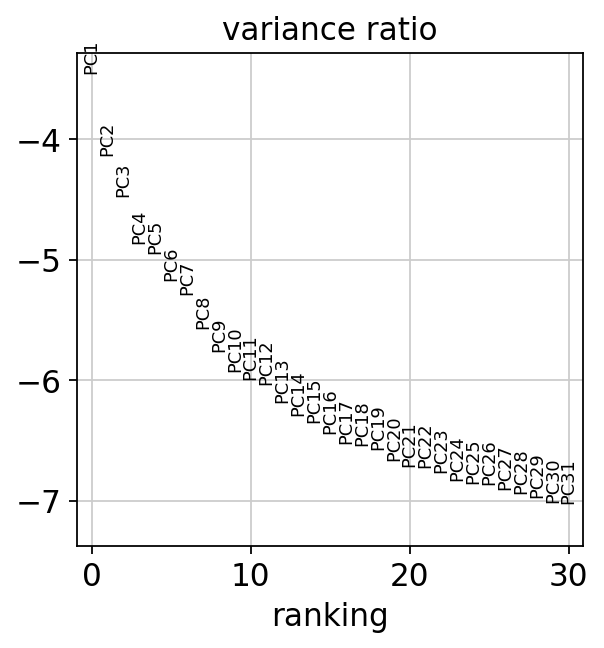

In [102]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, save='.pdf')

## Batch correction using HARMONY

In [103]:
# Extract PCA matrix and batch array
n_pcs = 5#5
pca = adata.obsm['X_pca'][:, 0:(n_pcs)]
batch = adata.obs['type']

In [104]:
# Batch-correct the PCA using HARMONY method
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [105]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)
set.seed(1000)
hem <- HarmonyMatrix(pca, batch, theta=1, do_pca=FALSE, verbose = FALSE)
hem = data.frame(hem)

In [106]:
# Add harmony values to the anndata object
adata.obsm['X_pca'] = hem.values

In [107]:
sc.pp.neighbors(adata, n_pcs = n_pcs, random_state=1)

In [108]:
# Visualize
sc.tl.umap(adata)

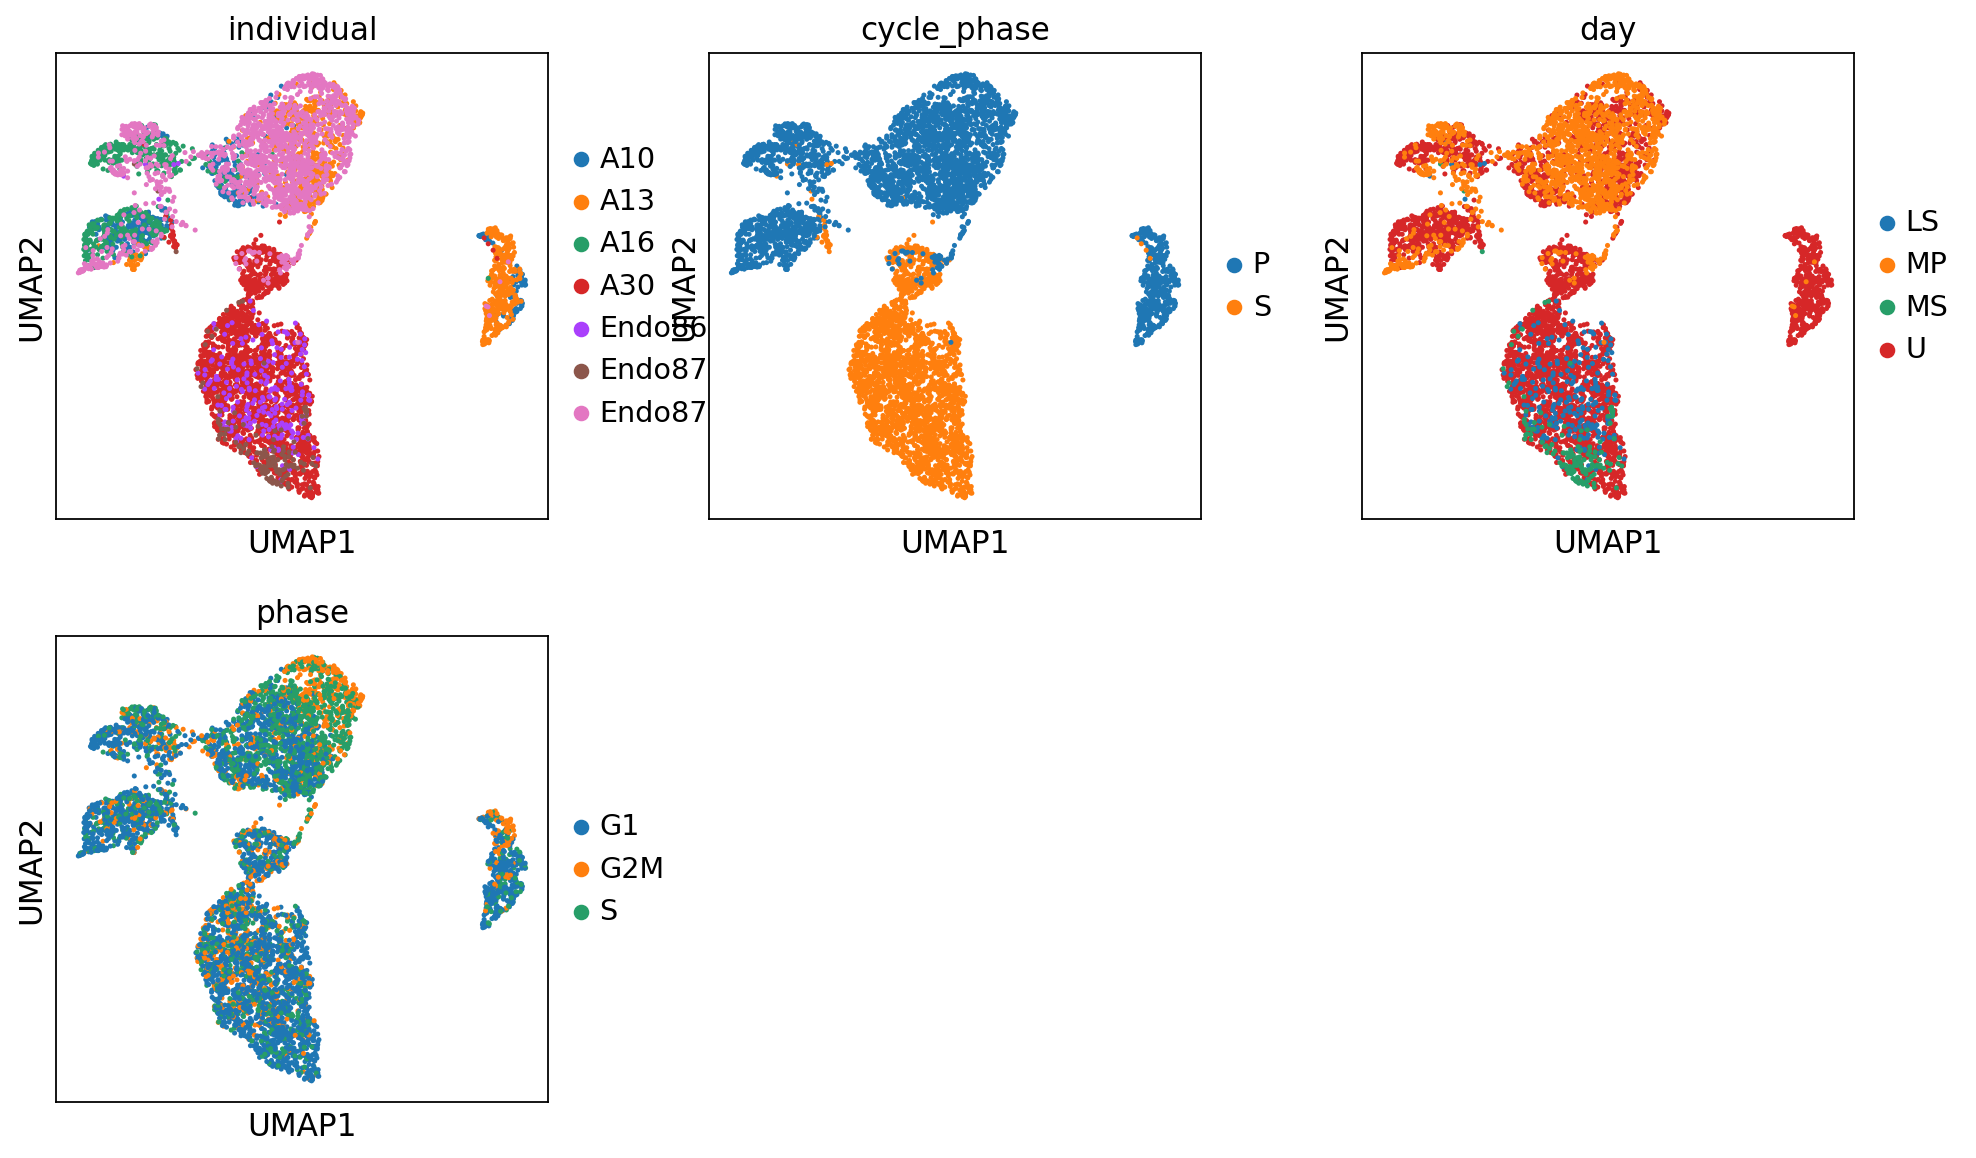

In [109]:
sc.pl.umap(adata, color=['individual','cycle_phase', 'day', 'phase'], save='.pdf', ncols = 3)

## Identify sub-clusters

In [122]:
sc.tl.leiden(adata, resolution=0.8)

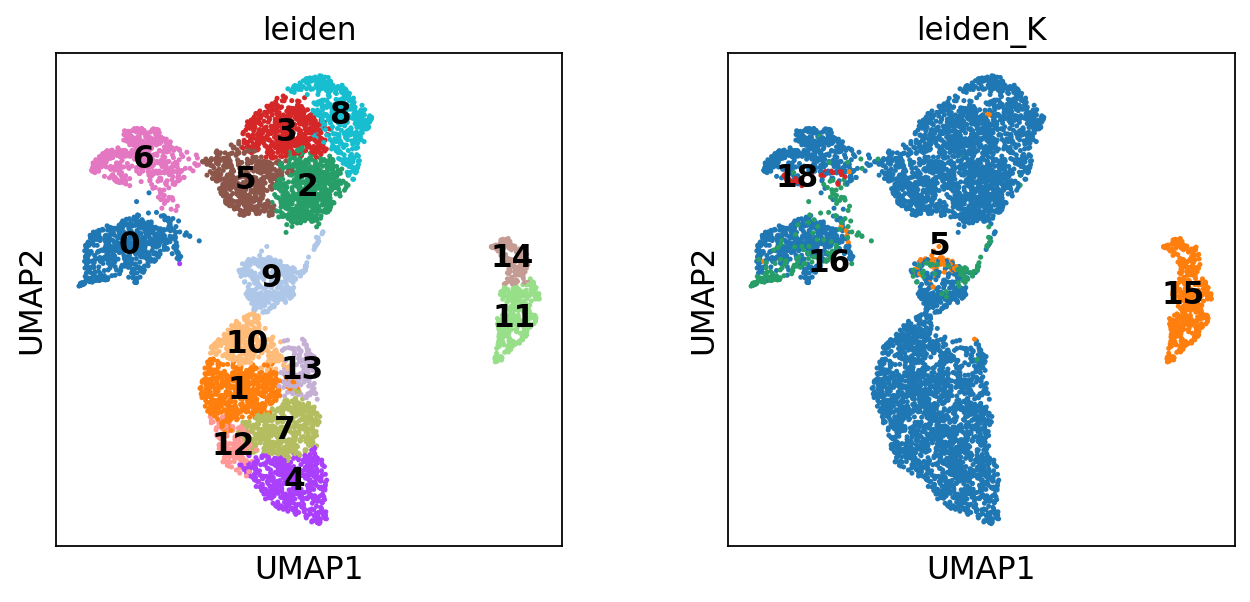

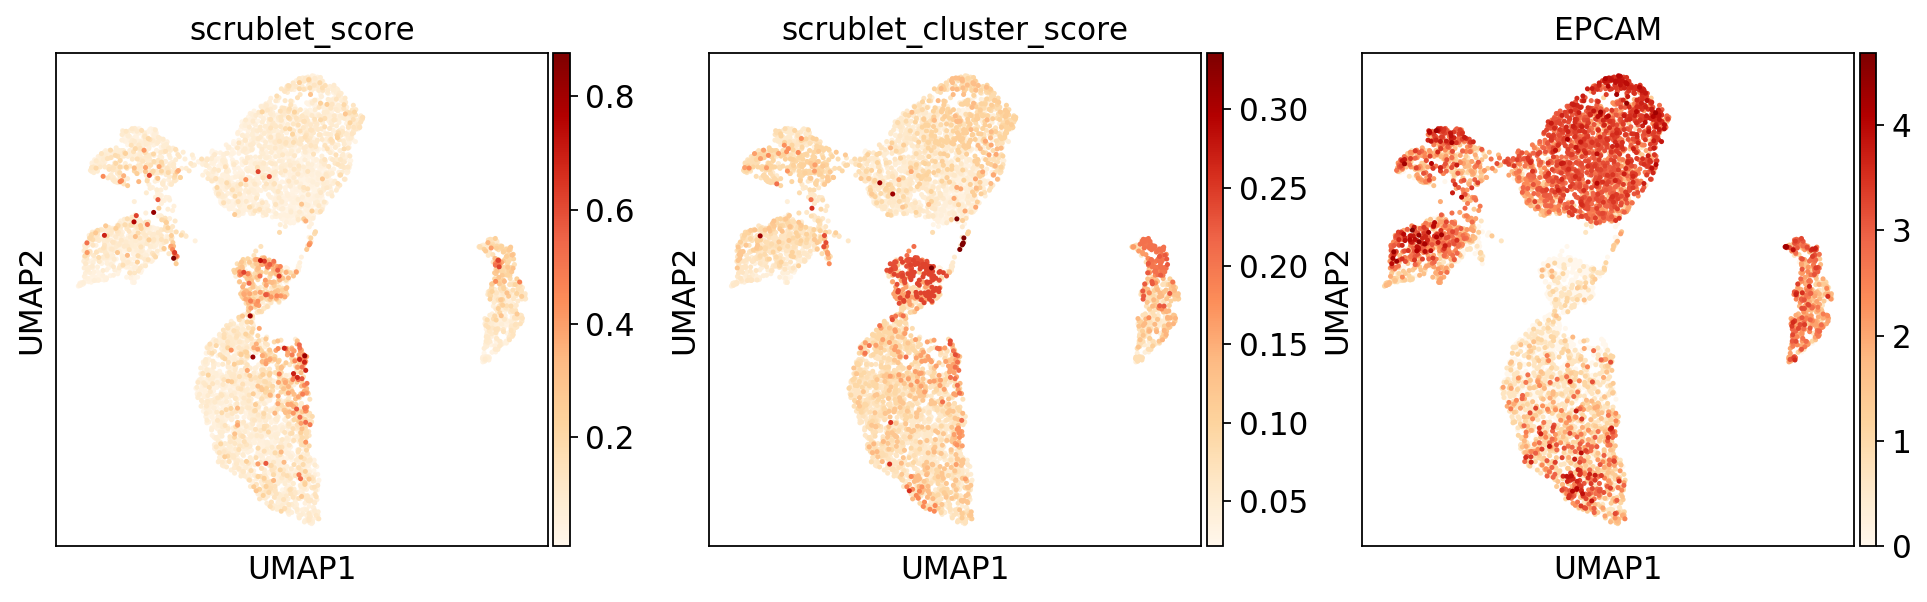

In [123]:
sc.pl.umap(adata, color=['leiden', 'leiden_K'],legend_loc='on data',save='_clustering_clusnumbers.pdf')
sc.pl.umap(adata, color=["scrublet_score", 'scrublet_cluster_score', 'EPCAM'], save='-markers_scrublet_score.pdf',color_map='OrRd') # FEMALE

25
20


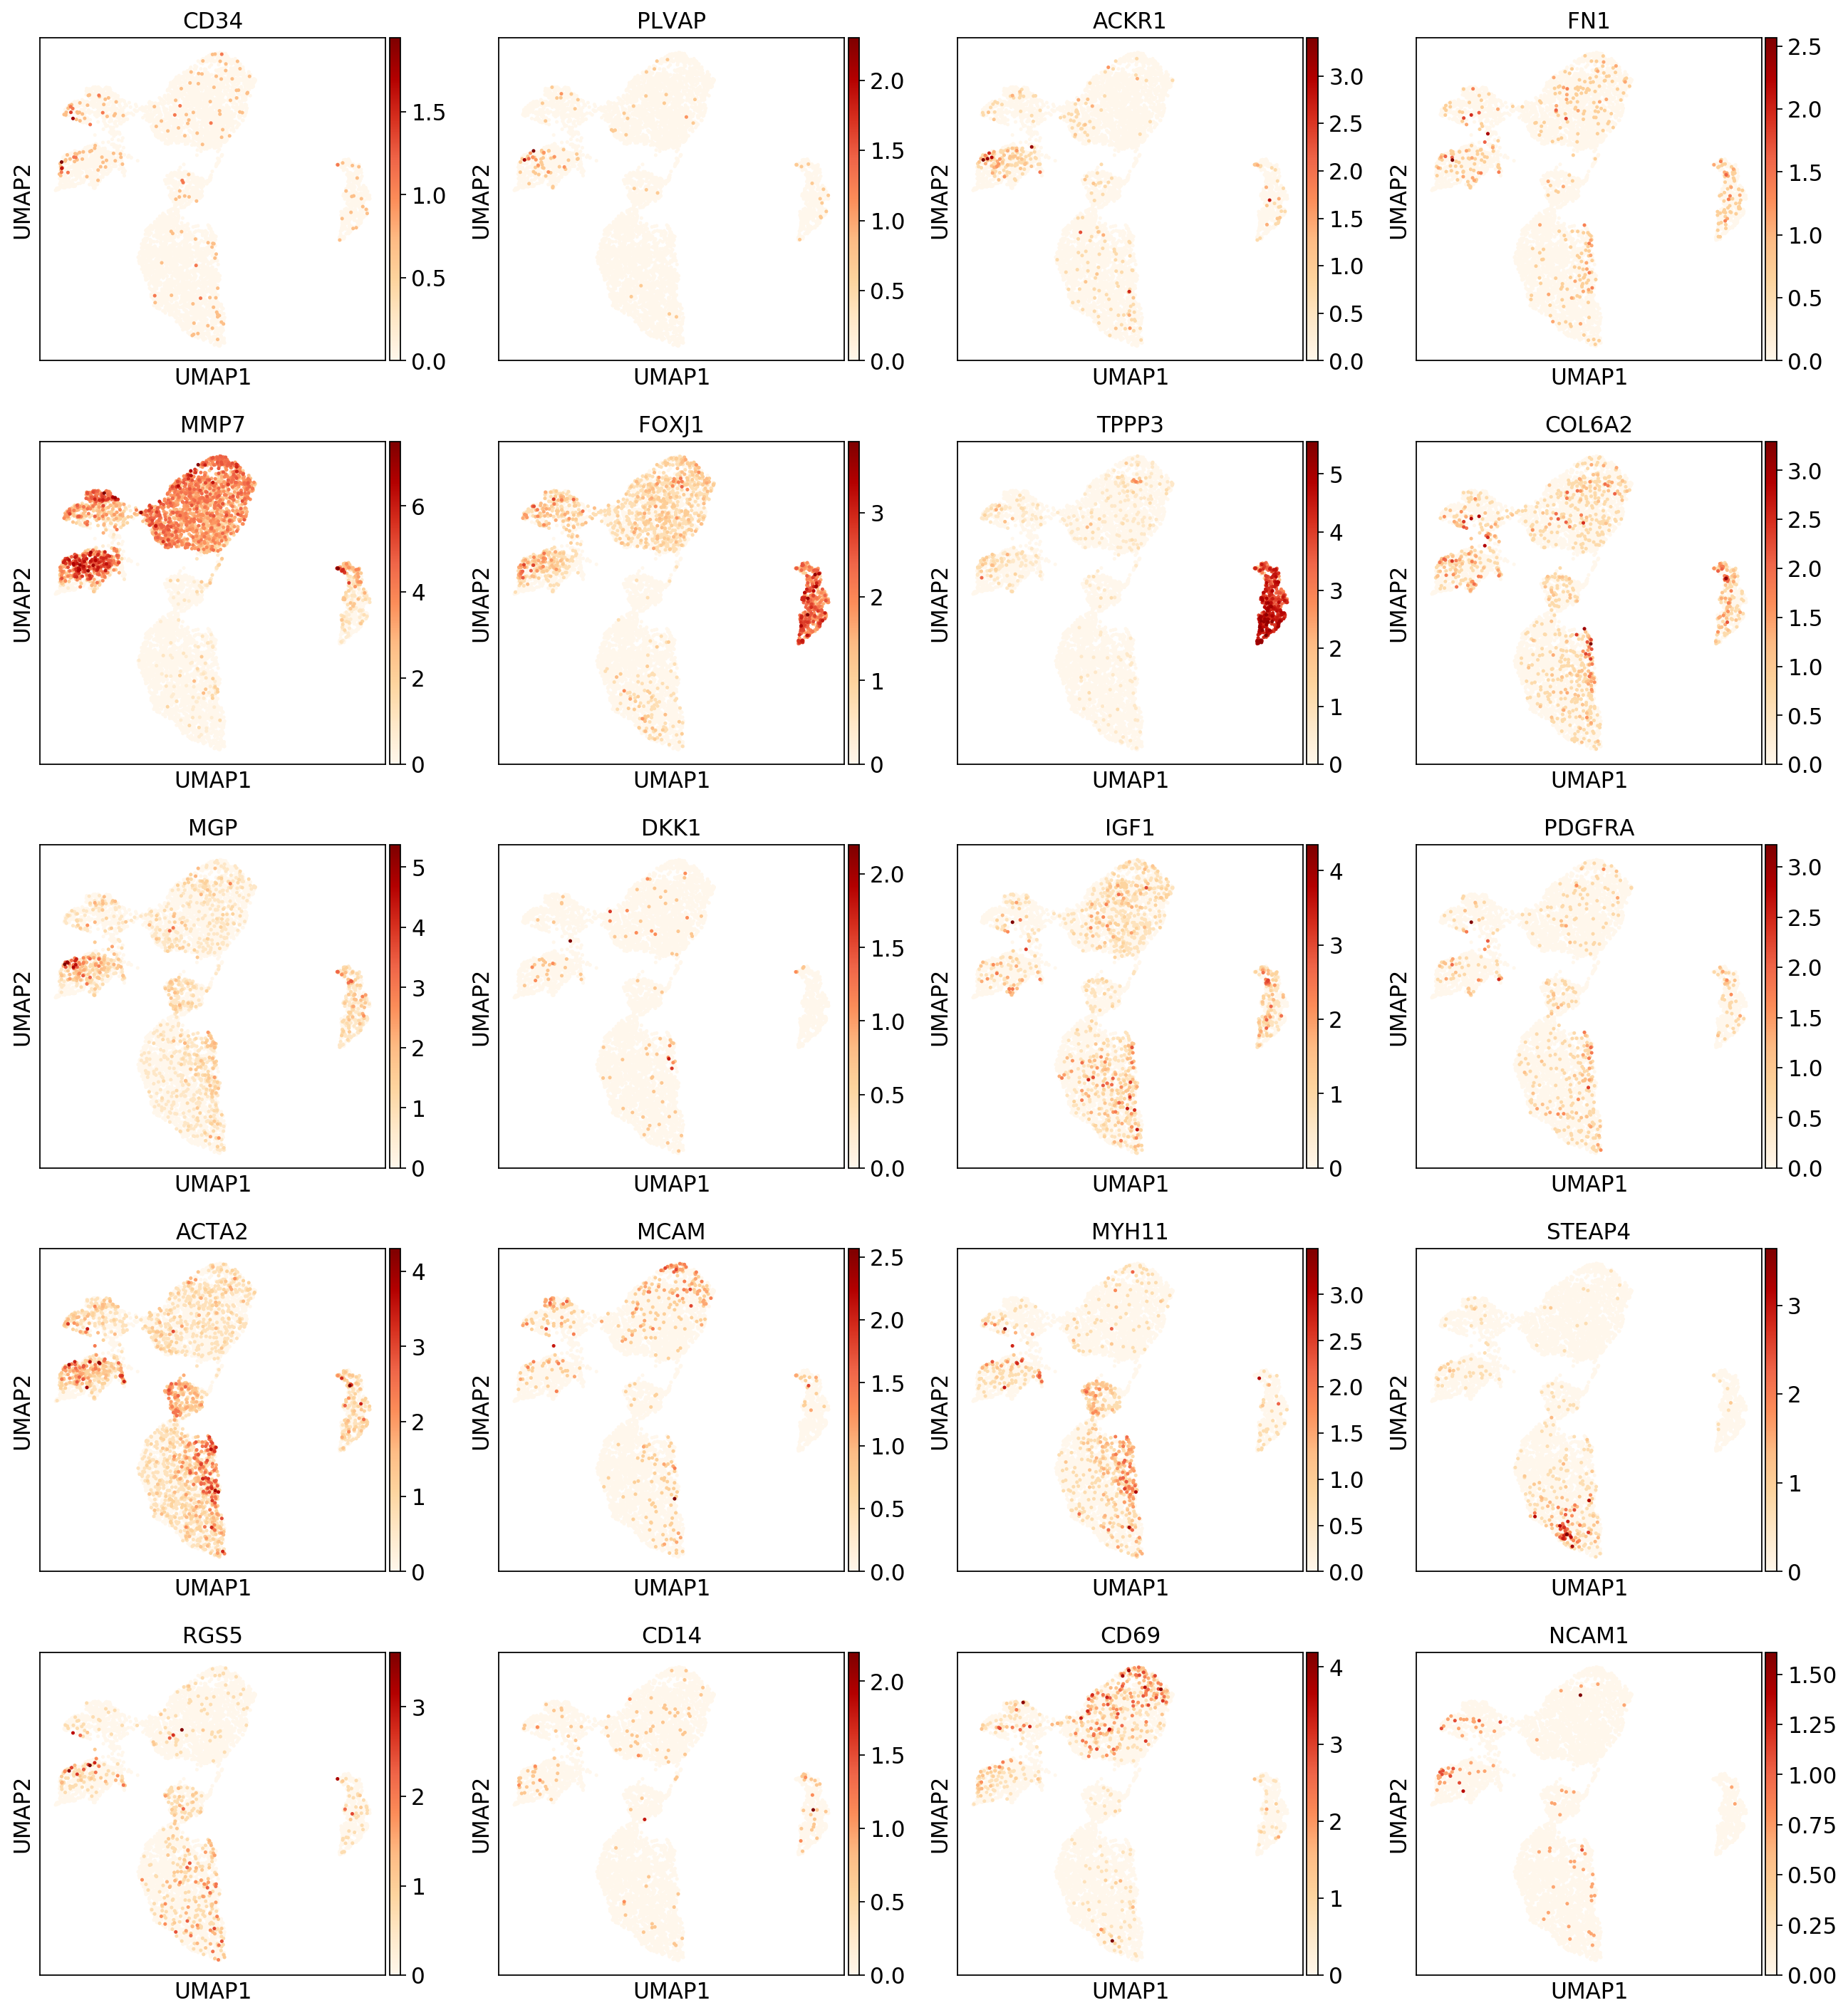

In [112]:
with open('data/markers/Markers_ALL.csv','r') as fid:
    markers = [line.rstrip() for line in fid.readlines()]

print(len(markers))
#make sure they're in the dataset, and sort them alphabetically for ease of finding things
no_markers = [item for item in markers if item not in adata.var_names]
markers = [item for item in markers if item in adata.var_names]
print(len(markers))

sc.pl.umap(adata, color=markers, save='-markers_doublets.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [113]:
# sc.pl.umap(adata, color=["SLC26A2", "DPP4", "PLAU", "SEMA3B",
#                          "LHX1", "LGR6", "KRT13", "WNT7A",
#                           "WIF1", "CCL2", "KRT5","LYPD1", "PAEP"], save='-markers_RoserPanel.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [114]:
# sc.pl.umap(adata, color=["PGR", "TRH", # Proliferative 
#                          "MMP10",# Menstruation 
#                          "GLI3", "IHH", "SHH",  # sonic hedgehog (Shh) pathway
#                          "PAEP", # Glandular secretory
#                          "IGFBP2", "LHX1", "GPRC5A", "MSX2", "BAMBI"], save='-markers_keystages.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [115]:
# sc.pl.umap(adata, color=["LGR6", "KRT13", "WNT7A", "MKI67", "SOX2", # progenitor 
#                          "WIF1",  "CCL2", # Unknown 2
#                          "LYPD1", # Unknown 2
#                          "CXCL14", #  Only Glandular
#                          "SLC26A2", "C2CD4B", #  Mid Secretory Glandular
#                          "DPP4", #  Late Secretory Glandular
#                          "PIFO", "FOXJ1", # ciliated
#                          "MUC5B" # new lubricant
#                         ], save='-markers_LuzPanel.pdf',color_map='OrRd', use_raw=True) # FEMALE

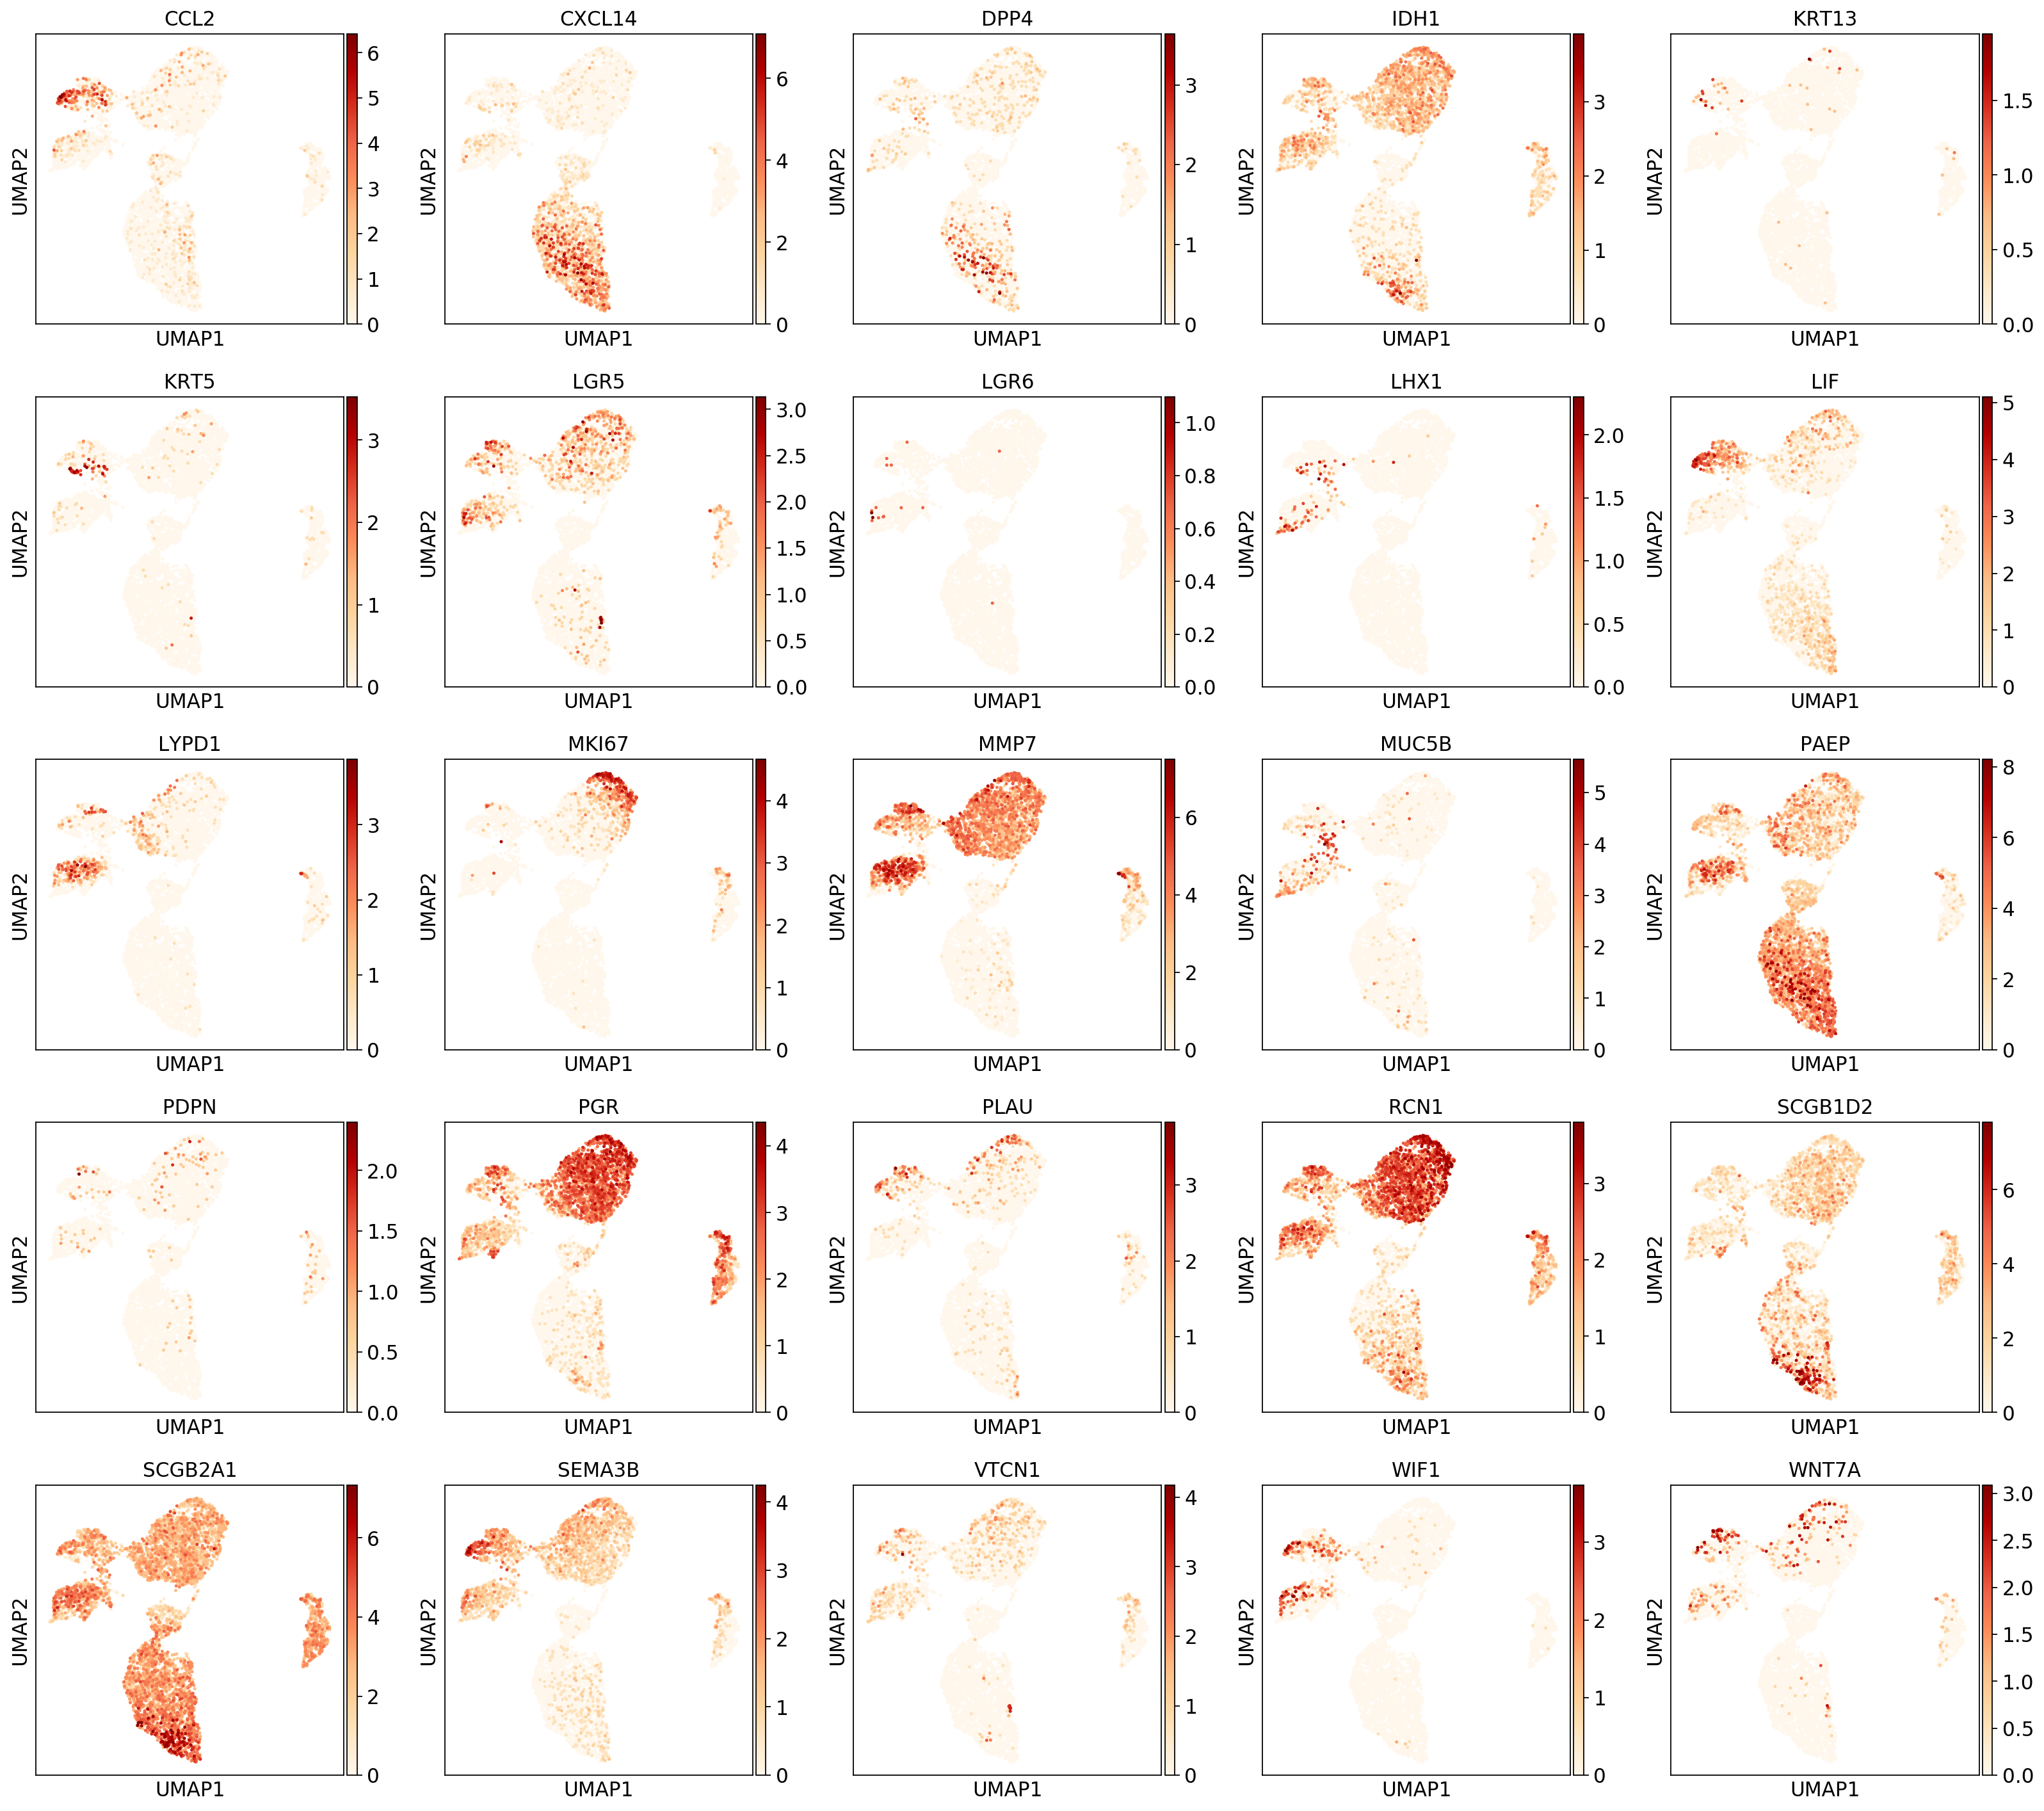

In [116]:
markers = ["LGR6", "WNT7A",  "LHX1", "KRT5", # progenitor 
                         "LGR5", "PDPN", "KRT13", "WIF1", "CCL2", "LYPD1",
                         "MMP7", 
                         "PAEP",  "DPP4", # Early Glandular
                         "SCGB1D2",# Late Glandular
                         "CXCL14", # Only secretory
                         "SEMA3B",  "MUC5B", "MKI67", "PLAU", 'PGR', "SCGB2A1", "VTCN1", "LIF", 'IDH1', 'RCN1']
markers = sorted(markers)
sc.pl.umap(adata, color=markers, save='-markers_pseudotime.pdf',color_map='OrRd', ncols=5) # FEMALE

In [117]:
# sc.pl.umap(adata, color=["MMP7", "PAEP", "KRT13", "KRT18", # Roser panel
#                          "WNT7A", "NOTCH2",# Roser panel
#                          "PLAU", "CXCL8", "LIF",# Roser panel
#                          "LGR6", "WIF1", "DKK3", # progenitor 
#                          "LYPD1", "PGR", "IHH",
#                          "PIFO", "FOXJ1",  #ciliated
#                          "SEMA3B", "SEMA3C", "SVIL", "FHL2", "CCL2", #luminal secretory
#                          "DCDC2", "HES6",  # from organoids analysis - early secretory
#                          "PLAU", # from Simon -  menstrual/ early proliferative
#                          "CXCL8", "SCGB2A1", # from Simon - mid secretory
#                          "PAEP", # from organoids analysis - late secretory
#                          "HMGB2", # proliferating
#                          "MUC5B", 'TFF3', # secretory mucosa
#                          "LIF", "MUC1", "VTCN1", "LGR5", "HPGD", "SULT1E1", "IL6", "TFF3", # unknown
#                         ], save='-markers.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [118]:
# sc.pl.umap(adata, color=["PLAU", "MMP7", "THBS1", "CADM1",
#                          "NPAS3", "ATP1A1", "ANK3", "ALPL", 
#                          "TRAK1", "SCGB1D2", "MT1F", "MT1X",
#                          "MT1E", "MT1G", "CXCL14", "MAOA",
#                          "DPP4", "NUPR1", "GPX3", "PAEP"], save='-markers_SimonTimeline.pdf',color_map='OrRd', use_raw=True) # FEMALE

## Save

In [124]:
# os.system('rm data/endometrium-N8-epithelial-clean_forSeurat.h5ad')
# adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
# adata_count.write('data/endometrium-N8-epithelial-clean_forSeurat.h5ad')

os.system('rm data/endometrium-N8-epithelial_Luzprocessing_freeze.h5ad')
adata.write('data/endometrium-N8-epithelial_Luzprocessing_freeze.h5ad')